# Install packages

In [ ]:
! pip install pmdarima
! pip install chart_studio
import pmdarima as pm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from pandas.core.tools.datetimes import to_datetime
from pandas import read_csv
from pandas import datetime
from pmdarima.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Process data

## Overall dataframe

In [380]:
name_of_station = "KAPT"

In [381]:
# load dataset
all_data = pd.read_csv('/content/gdrive/MyDrive/Datathon2022/all_stations.csv', header=0, index_col=0)
df = all_data[all_data['station_name'] == name_of_station]
df = df.drop('station_name', axis=1)
# Impute missing data by linear interpollation
df = df.replace('MM', np.nan)
df = df.astype('float')

In [382]:
# See the percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
month,month,0.000000
day,day,0.000000
hour,hour,0.000000
minute,minute,0.000000
WDIR_wind_direction,WDIR_wind_direction,6.935882
WSPD_wind_speed,WSPD_wind_speed,0.154131
GST_gust_speed,GST_gust_speed,69.913687
WVHT_wave_height,WVHT_wave_height,100.000000
DPD_dominant_wave_period,DPD_dominant_wave_period,100.000000
APD_average_wave_period,APD_average_wave_period,100.000000


In [383]:
df = df.interpolate()
df = df.reset_index()
# Convert data to time series format
df['time'] = to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df.index = df.time
df.head(2)

,year,month,day,hour,minute,WDIR_wind_direction,WSPD_wind_speed,GST_gust_speed,WVHT_wave_height,DPD_dominant_wave_period,APD_average_wave_period,MWD_wave_degree,PRES_sea_level_pressure,ATMP_air_temperature,WTMP_sea_surface_temperature,DEWP_dewpoint_temperature,VIS_station_visibility,PTDY_pressure_tendency,TIDE_water_level,time
time,,,,,,,,,,,,,,,,,,,,
2022-01-29 14:35:00,2022,1.0,29.0,14.0,35.0,330.0,3.1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,3.0,8.7,NaN,NaN,2022-01-29 14:35:00
2022-01-29 01:55:00,2022,1.0,29.0,1.0,55.0,360.0,9.8,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,-2.0,8.7,NaN,NaN,2022-01-29 01:55:00


## Select relevant columns

In [384]:
# select relevant columns
df_revelant = df[['WDIR_wind_direction', 'WSPD_wind_speed', 'ATMP_air_temperature', 'DEWP_dewpoint_temperature', 'VIS_station_visibility']]

## Train-test split

In [385]:
#creating the train and validation set
train = df_revelant[:int(0.8*(len(df_revelant)))]
valid = df_revelant[int(0.8*(len(df_revelant))):]

# Analyze data

## wind direction

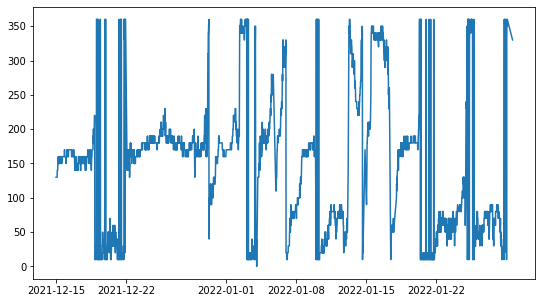

In [ ]:
# plot the time series of wind direction
ts_dir = pd.Series(np.array(df['WDIR_wind_direction']), index=df['time'])
plt.plot(ts_dir)

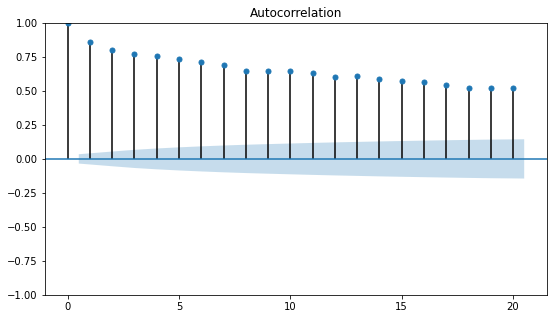

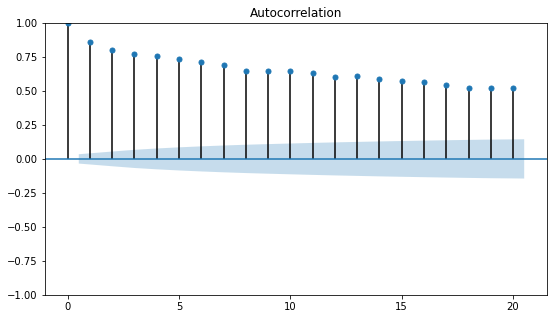

In [ ]:
# Plot the autocorrelation function for wind direction
plot_acf(df['WDIR_wind_direction'], lags=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



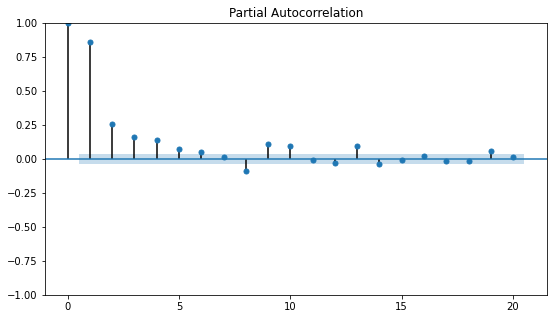

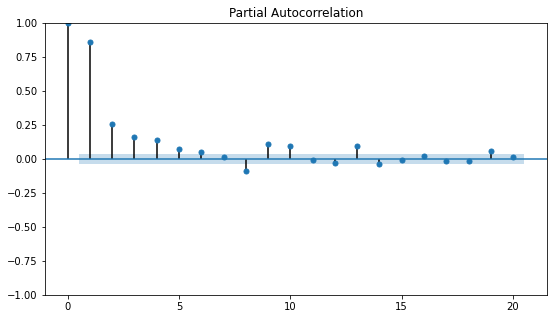

In [ ]:
# Plot the partial autocorrelation function for wind direction
plot_pacf(df['WDIR_wind_direction'], lags=20)

## wind speed

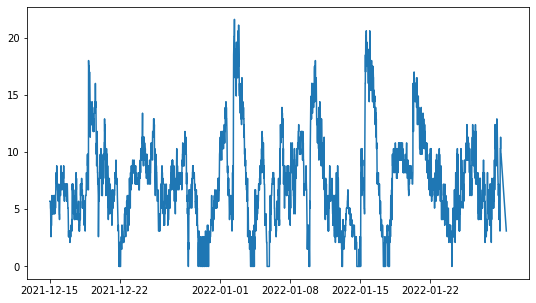

In [ ]:
# plot the time series of wind speed
ts_speed = pd.Series(np.array(df['WSPD_wind_speed']), index=df['time'])
plt.plot(ts_speed)

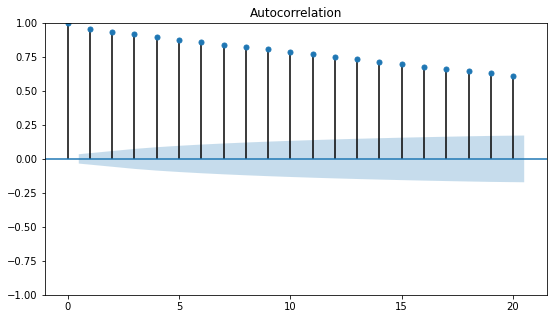

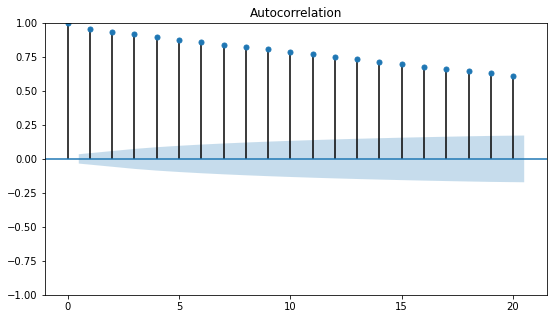

In [ ]:
# Plot the autocorrelation function for wind speed
plot_acf(df['WSPD_wind_speed'], lags=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



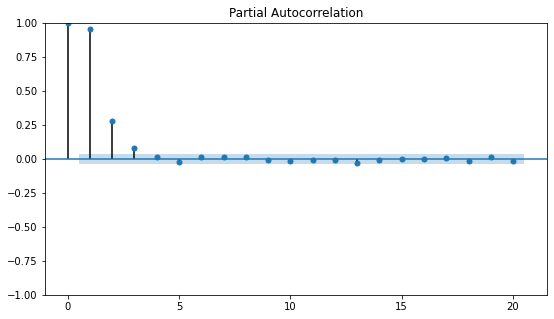

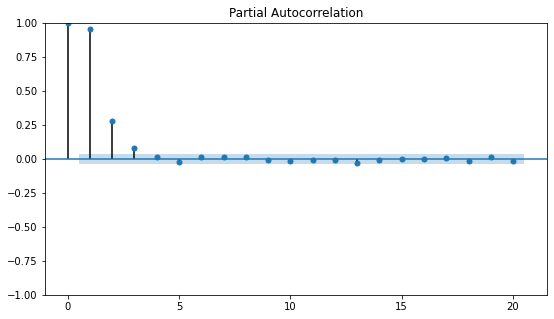

In [ ]:
# Plot the partial autocorrelation function for wind speed
plot_pacf(df['WSPD_wind_speed'], lags=20)

## Stationarity (needs all variables to be stationary)

In [392]:
from statsmodels.tsa.stattools import adfuller
#perform augmented Dickey-Fuller test
adfuller(df.WDIR_wind_direction)
# The low p-value shows that the variable is stationary

(-5.319319566336805,
 4.993011051765261e-06,
 26,
 3217,
 {'1%': -3.4323843567237304,
  '10%': -2.5672484809368243,
  '5%': -2.862438856077707},
 33370.78515955847)

In [393]:
adfuller(df.WDIR_wind_direction)

(-5.319319566336805,
 4.993011051765261e-06,
 26,
 3217,
 {'1%': -3.4323843567237304,
  '10%': -2.5672484809368243,
  '5%': -2.862438856077707},
 33370.78515955847)

In [394]:
adfuller(df.ATMP_air_temperature)

(-3.3232903604006947,
 0.013868956094255131,
 16,
 3227,
 {'1%': -3.432378047525015,
  '10%': -2.5672469973560355,
  '5%': -2.862436069383185},
 3203.907781274771)

In [395]:
adfuller(df.DEWP_dewpoint_temperature)

(-2.913470327243133,
 0.043803855497245234,
 10,
 3233,
 {'1%': -3.4323742807550994,
  '10%': -2.56724611161536,
  '5%': -2.862434405645001},
 5194.171106412667)

In [396]:
adfuller(df.VIS_station_visibility) 

(-3.9288766480132655,
 0.001832315186567748,
 21,
 3222,
 {'1%': -3.432381197225056,
  '10%': -2.567247737994645,
  '5%': -2.8624374605672154},
 7613.070690538831)

## Decompose

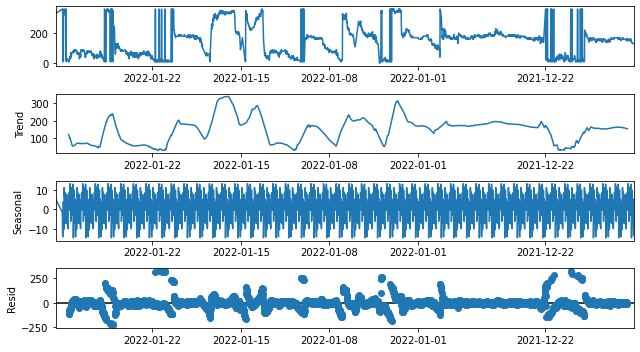

In [397]:
import statsmodels as sm
import statsmodels.api as sm
import matplotlib
decomposition = sm.tsa.seasonal_decompose(ts_dir, model = 'additive', period=72) # can use multiplicative for speed
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

# Modeling

## Univariate ARIMA

### Fitting model

In [398]:
# Fit the univariate ARIMA model automatically
model_dir = pm.auto_arima(train['WDIR_wind_direction'], d=0)
model = model_dir
model_dir

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

In [399]:
model_speed = pm.auto_arima(train['WSPD_wind_speed'], d=0)
model_speed

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [400]:
#model_air = pm.auto_arima(train['ATMP_air_temperature'], d=0)
#model_air

ARIMA(order=(2, 0, 4), scoring_args={}, suppress_warnings=True)

In [401]:
#model_dew = pm.auto_arima(train['DEWP_dewpoint_temperature'], d=0)
#model_dew

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [402]:
#model_vis = pm.auto_arima(train['VIS_station_visibility'], d=0)
#model_vis 

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [403]:
#print(model_dir.summary())

### Model diagnostics

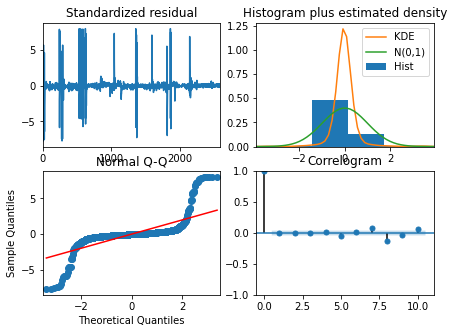

In [404]:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
model_dir.plot_diagnostics(figsize=(7,5))
plt.show()

### Validation

#### direction

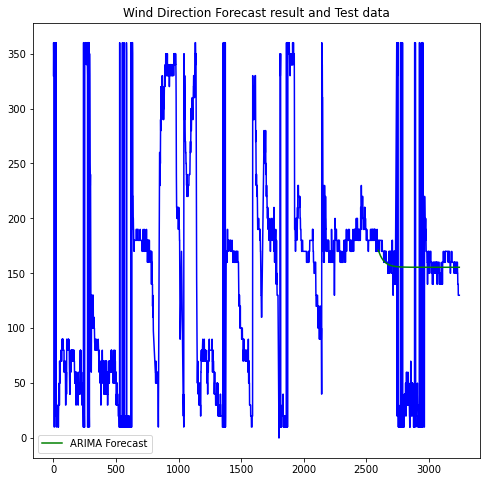

In [405]:
# make the forecasts for direction
pred_dir = model_dir.predict(n_periods=len(valid))
# Setting plot parameters
plt.figure(figsize  = (8,8))
plt.title('Wind Direction Forecast result and Test data')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(range(len(df['WDIR_wind_direction'])), df['WDIR_wind_direction'], c='blue')
plt.plot(range(len(train), len(df_revelant)), pred_dir, c='green', label = 'ARIMA Forecast')
# plt.plot(time, test, c='red', label = 'Test Data')
plt.legend()
plt.show()

In [406]:
# MSE
np.sum(np.square(np.array(pred_dir - valid['WDIR_wind_direction'])))/len(pred_dir)

7211.185957158653

#### speed

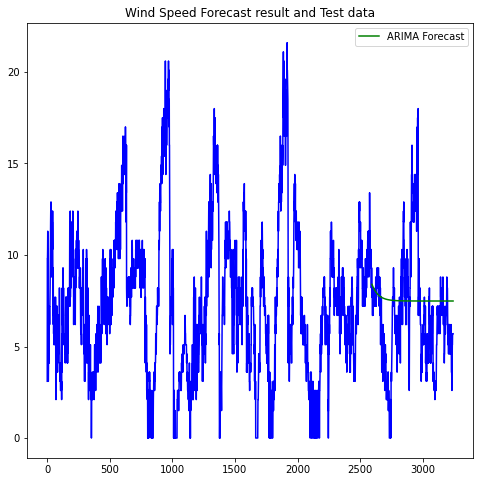

In [407]:
# make the forecasts for speed
pred_speed = model_speed.predict(n_periods=len(valid))
# Setting plot parameters
plt.figure(figsize  = (8,8))
plt.title('Wind Speed Forecast result and Test data')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(range(len(df['WSPD_wind_speed'])), df['WSPD_wind_speed'], c='blue')
plt.plot(range(len(train), len(df_revelant)), pred_speed, c='green', label = 'ARIMA Forecast')
# plt.plot(time, test, c='red', label = 'Test Data')
plt.legend()
plt.show()

In [408]:
# MSE
np.sum(np.square(np.array(pred_speed - valid['WSPD_wind_speed'])))/len(pred_speed)

9.870165494000865

## VAR

### Fit model

In [409]:
#fit the model
train_var = np.array(train)
valid_var = np.array(valid)
model_var = VAR(endog=train_var)
model_var_fit = model_var.fit(2)
pred_var = model_var_fit.forecast(valid_var, steps=len(valid_var))

### Select VAR order

In [410]:
x = model_var.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,18.36,18.37,9.424e+07,18.37
1,4.545,4.613,94.13,4.569
2,4.234,4.359*,69.02,4.280
3,4.182,4.363,65.50,4.248
4,4.149,4.387,63.35,4.235*
5,4.140*,4.435,62.83*,4.247
6,4.142,4.493,62.93,4.269
7,4.145,4.553,63.10,4.293
8,4.143,4.608,62.98,4.311
9,4.146,4.667,63.16,4.335


### Use order of 2

In [411]:
# Refit the model
model_var = VAR(endog=train_var)
model_var_fit = model_var.fit(2)
# Get the lag order
lag_order = model_var_fit.k_ar 
# Input data for forecasting
pred_var2 = model_var_fit.forecast(train_var[-lag_order:], steps=len(valid_var))

#### direction

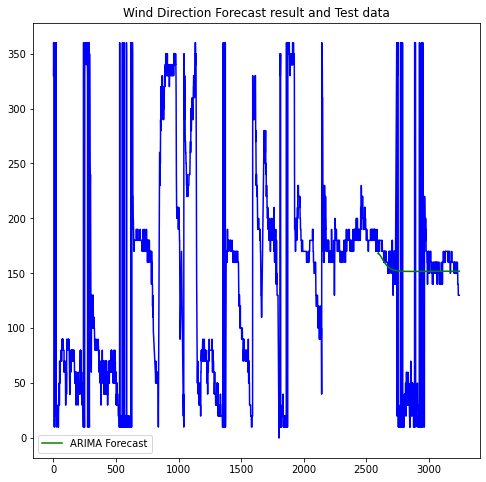

In [412]:
# Forecast for direction
# Setting plot parameters
plt.figure(figsize  = (8,8))
plt.title('Wind Direction Forecast result and Test data')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(range(len(df['WDIR_wind_direction'])), df['WDIR_wind_direction'], c='blue')
plt.plot(range(len(train), len(df_revelant)), pred_var2.T[0], c='green', label = 'ARIMA Forecast')
# plt.plot(time, test, c='red', label = 'Test Data')
plt.legend()
plt.show()

In [413]:
# MSE
np.sum(np.square(np.array(pred_var2.T[0] - valid['WDIR_wind_direction'])))/len(pred_var2.T[0])

7028.037407931698

#### speed

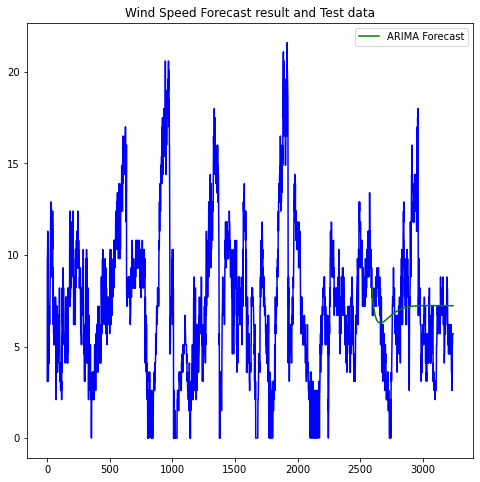

In [414]:
# Forecast for speed
# Setting plot parameters
plt.figure(figsize  = (8,8))
plt.title('Wind Speed Forecast result and Test data')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(range(len(df['WSPD_wind_speed'])), df['WSPD_wind_speed'], c='blue')
plt.plot(range(len(train), len(df_revelant)), pred_var2.T[1], c='green', label = 'ARIMA Forecast')
# plt.plot(time, test, c='red', label = 'Test Data')
plt.legend()
plt.show()

In [415]:
# MSE
np.sum(np.square(np.array(pred_var2.T[1] - valid['WSPD_wind_speed'])))/len(pred_var2.T[1])

9.004629916277208

### Use order of 4

In [416]:
# Refit the model
model_var = VAR(endog=train_var)
model_var_fit = model_var.fit(4)
# Get the lag order
lag_order = model_var_fit.k_ar 
# Input data for forecasting
pred_var4 = model_var_fit.forecast(train_var[-lag_order:], steps=len(valid_var))

#### direction

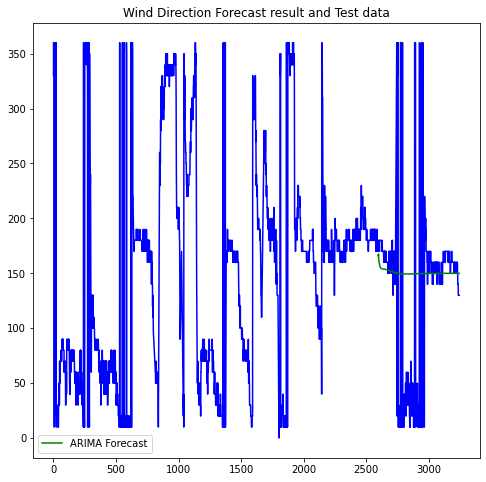

In [417]:
# Setting plot parameters
plt.figure(figsize  = (8,8))
plt.title('Wind Direction Forecast result and Test data')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(range(len(df['WDIR_wind_direction'])), df['WDIR_wind_direction'], c='blue')
plt.plot(range(len(train), len(df_revelant)), pred_var4.T[0], c='green', label = 'ARIMA Forecast')
# plt.plot(time, test, c='red', label = 'Test Data')
plt.legend()
plt.show()

In [418]:
# MSE
np.sum(np.square(np.array(pred_var4.T[0] - valid['WDIR_wind_direction'])))/len(pred_var4.T[0])

6951.009010305725

#### speed

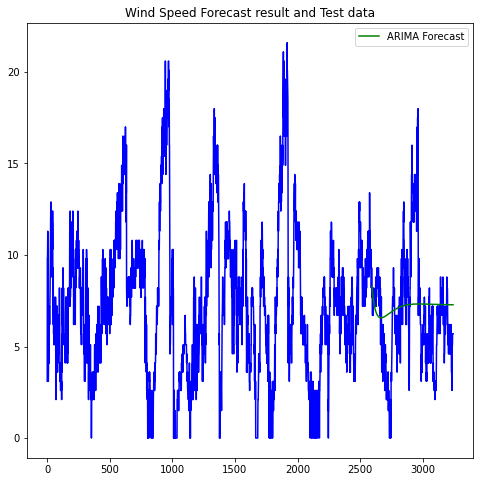

In [419]:
# Forecast for speed
# Setting plot parameters
plt.figure(figsize  = (8,8))
plt.title('Wind Speed Forecast result and Test data')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(range(len(df['WSPD_wind_speed'])), df['WSPD_wind_speed'], c='blue')
plt.plot(range(len(train), len(df_revelant)), pred_var4.T[1], c='green', label = 'ARIMA Forecast')
# plt.plot(time, test, c='red', label = 'Test Data')
plt.legend()
plt.show()

In [420]:
# MSE
np.sum(np.square(np.array(pred_var4.T[1] - valid['WSPD_wind_speed'])))/len(pred_var4.T[1])

9.055009181976082

## Final Model: VAR of order 2

In [429]:
# Refit the model
df_var = np.array(df_revelant)
final_model = VAR(endog=df_var)
final_model_fit = final_model.fit(2)
# Get the lag order
lag_order = final_model_fit.k_ar 
# Input data for forecasting
forecasts = final_model_fit.forecast(df_var[-lag_order:], steps=216)

#### direction

time
2022-01-29 14:35:00   2022-01-29 14:35:00
2022-01-29 01:55:00   2022-01-29 01:55:00
2022-01-29 01:35:00   2022-01-29 01:35:00
2022-01-29 01:15:00   2022-01-29 01:15:00
2022-01-29 00:55:00   2022-01-29 00:55:00
                              ...        
2021-12-15 01:35:00   2021-12-15 01:35:00
2021-12-15 01:15:00   2021-12-15 01:15:00
2021-12-15 00:55:00   2021-12-15 00:55:00
2021-12-15 00:35:00   2021-12-15 00:35:00
2021-12-15 00:15:00   2021-12-15 00:15:00
Name: time, Length: 3244, dtype: datetime64[ns]

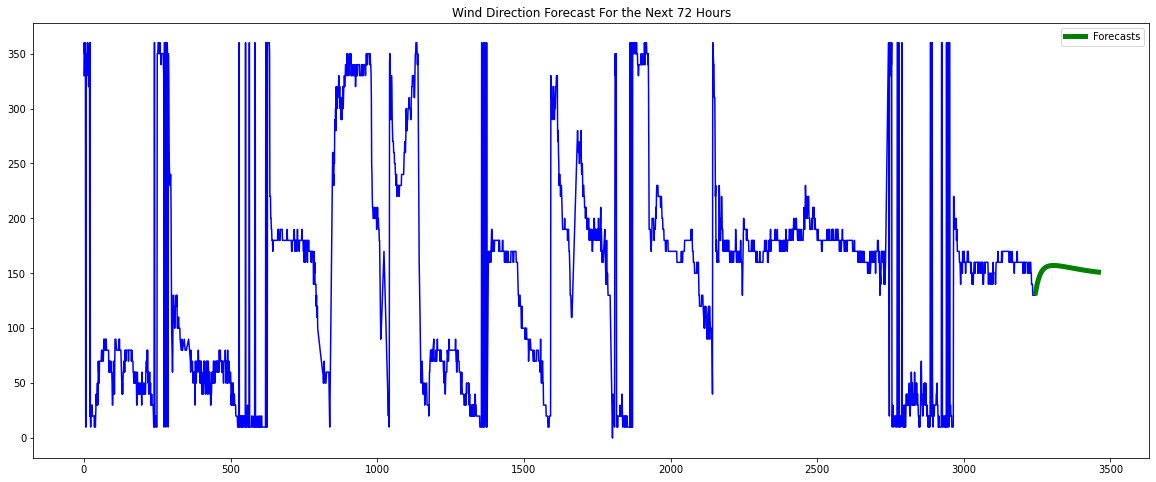

In [440]:
# Forecast for direction
# Setting plot parameters
plt.figure(figsize  = (20,8))
plt.title('Wind Direction Forecast For the Next 72 Hours')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(range(len(df['WDIR_wind_direction'])), df['WDIR_wind_direction'], c='blue')
plt.plot(range(len(df['WDIR_wind_direction']), len(df['WDIR_wind_direction'])+216), forecasts.T[0], linewidth = 5, c='green', label = 'Forecasts')
# plt.plot(time, test, c='red', label = 'Test Data')
plt.legend()
plt.show()

In [444]:
# Forecast for direction
# Setting plot parameters
plt.figure(figsize  = (20,8))
plt.title('Wind Direction Forecast For the Next 72 Hours')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(df.time, df['WDIR_wind_direction'], c='blue')
plt.plot(range(len(df['WDIR_wind_direction']), len(df['WDIR_wind_direction'])+216), forecasts.T[0], linewidth = 5, c='green', label = 'Forecasts')
# plt.plot(time, test, c='red', label = 'Test Data')
plt.legend()
plt.show()

ValueError: ignored

#### speed

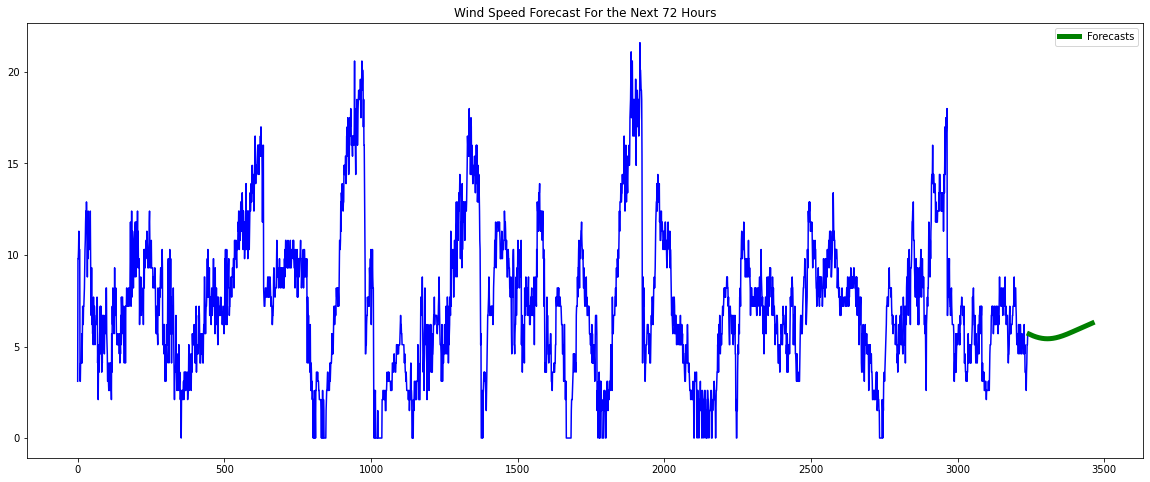

In [439]:
# Forecast for direction
# Setting plot parameters
plt.figure(figsize  = (20,8))
plt.title('Wind Speed Forecast For the Next 72 Hours')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(range(len(df['WSPD_wind_speed'])), df['WSPD_wind_speed'], c='blue')
plt.plot(range(len(df['WSPD_wind_speed']), len(df['WSPD_wind_speed'])+216), forecasts.T[1], linewidth = 5, c='green', label = 'Forecasts')
# plt.plot(time, test, c='red', label = 'Test Data')
plt.legend()
plt.show()

#References



https://medium.com/geekculture/3-top-python-packages-for-time-series-analysis-21873eac6dde

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/